In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
#from sklearn.metrics import accuracy_score
#import sklearn.metrics as metrics
#from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
#from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import Lasso
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
#np.random.seed(7)

# Data Preprocessing

In [2]:
df = pd.read_csv("cleanedpreproc_data.csv")

In [3]:
df

,GeneSymbol,GSM3304749,GSM3304750,GSM3304751,GSM3304752,GSM3304753,GSM3304754,GSM3304755,GSM3304756,GSM3304757,...,GSM2674207,GSM2674208,GSM2674209,GSM2674210,GSM2674211,GSM2674212,GSM2674213,GSM2674214,GSM2674215,GSM2674216
0,ZZEF1,3.543915,4.669541,4.684001,3.672934,5.078265,4.903896,4.430831,4.641150,4.389870,...,7.464159,7.914156,8.100090,7.390065,7.922274,7.565272,8.561690,8.646769,7.626992,7.654211
1,ZYX,5.291483,5.126582,5.588772,5.664340,5.652518,5.364555,5.749522,5.404242,5.694412,...,8.814271,9.114553,8.725553,8.968538,8.476248,8.760942,8.353912,8.512089,8.768739,8.747568
2,ZYG11B,3.661405,3.525901,3.202704,4.368887,3.606875,4.649293,4.044223,4.007332,4.570286,...,7.900868,7.080267,7.394235,7.279504,7.329826,7.532179,7.242337,7.352385,7.180274,7.020832
3,ZSWIM6,4.946741,5.010654,3.427056,5.192288,4.841011,5.168782,4.304319,5.022567,4.218901,...,8.813342,9.057461,8.622829,8.014262,8.583356,8.022867,8.950596,8.878660,7.755057,8.066192
4,ZSCAN18,2.431252,3.764021,4.391402,4.526305,4.785142,5.283211,4.665003,2.624227,4.908068,...,6.739993,6.815096,7.017143,6.950990,6.777234,6.945268,7.237894,7.051445,6.786810,6.943722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,AATBC,1.415698,1.349907,1.849014,0.735817,1.642501,1.377707,1.631470,1.093533,0.517822,...,6.478276,6.664740,6.657407,6.757995,6.745061,6.685470,6.947415,6.732995,6.658673,6.657693
2364,AASDHPPT,3.992319,3.117800,2.893817,4.324919,3.005481,3.583078,3.560180,3.351017,3.271023,...,7.551017,6.991695,7.044425,7.323171,7.211589,7.262168,6.698378,6.864912,7.451274,6.937415
2365,AAK1,4.057154,3.856373,3.065095,3.496000,3.295990,3.458838,3.776482,3.497955,3.489444,...,7.985531,7.594218,7.723382,7.477896,7.471120,7.100209,7.808039,7.829984,7.334923,7.569850
2366,A2M,8.180747,8.853627,8.567979,8.880973,9.047023,8.188142,8.100625,8.339232,8.580138,...,9.438038,9.377007,9.616547,8.019933,8.858675,9.344797,9.392905,9.128658,8.688823,9.145485


In [4]:
df.shape

(2368, 566)

In [5]:
df = df.T

In [6]:
#Transform the input data
df.rename(columns=df.iloc[0], inplace = True)
df.drop(df.index[0], inplace = True)
df=df.reset_index()

In [7]:
df

,index,ZZEF1,ZYX,ZYG11B,ZSWIM6,ZSCAN18,ZNRF3,ZNFX1,ZNF91,ZNF84,...,ABCC3,ABCC13,ABCB11,ABCA8,ABCA5,AATBC,AASDHPPT,AAK1,A2M,A1CF
0,GSM3304749,3.543915,5.291483,3.661405,4.946741,2.431252,4.626512,4.450099,5.278356,3.071528,...,5.667215,1.304289,1.034628,1.373946,4.360784,1.415698,3.992319,4.057154,8.180747,3.963825
1,GSM3304750,4.669541,5.126582,3.525901,5.010654,3.764021,3.737052,5.014631,5.019946,3.07582,...,7.103003,3.306514,0.923388,3.203698,5.290429,1.349907,3.1178,3.856373,8.853627,5.72163
2,GSM3304751,4.684001,5.588772,3.202704,3.427056,4.391402,1.943505,4.754172,3.421623,2.716199,...,6.331714,3.032245,3.253031,1.98941,4.905689,1.849014,2.893817,3.065095,8.567979,5.381179
3,GSM3304752,3.672934,5.66434,4.368887,5.192288,4.526305,5.192288,4.653923,4.87073,4.162364,...,4.915671,1.38896,0.912858,3.269553,3.695036,0.735817,4.324919,3.496,8.880973,3.564186
4,GSM3304753,5.078265,5.652518,3.606875,4.841011,4.785142,3.888695,4.32586,4.459337,3.772354,...,6.320133,2.39812,1.660996,4.192682,4.495337,1.642501,3.005481,3.29599,9.047023,5.015254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,GSM2674212,7.565272,8.760942,7.532179,8.022867,6.945268,8.351372,8.006806,7.924716,7.103331,...,8.431431,3.885267,4.588383,4.421687,5.544456,6.68547,7.262168,7.100209,9.344797,6.587662
561,GSM2674213,8.56169,8.353912,7.242337,8.950596,7.237894,7.663091,7.86309,8.415026,7.379443,...,8.936669,4.412502,4.786598,5.825562,7.705177,6.947415,6.698378,7.808039,9.392905,8.448525
562,GSM2674214,8.646769,8.512089,7.352385,8.87866,7.051445,8.398908,7.802117,7.57274,7.469878,...,9.401875,4.627792,4.89788,5.028397,7.439738,6.732995,6.864912,7.829984,9.128658,7.948694
563,GSM2674215,7.626992,8.768739,7.180274,7.755057,6.78681,8.190701,7.717389,7.356841,7.582869,...,8.495463,3.946565,4.661783,4.673468,5.916643,6.658673,7.451274,7.334923,8.688823,6.478046


In [8]:
metadata = pd.read_csv("metadata_col_info.csv")

In [9]:
df= df.merge(metadata, left_on="index", right_on= "Unnamed: 0")

In [10]:
df['title0'] = df['title0'].replace('(?i)mucosa|normal|healthy', 0, regex=True)


In [11]:
df['title0'] = df['title0'].replace('(?i)Tumor|Cancer|adenocarcinoma|CRC', 2, regex=True)

In [12]:
df['title0'] = df['title0'].replace('(?i)Adenoma|adenoma', 1, regex=True)

In [13]:
df = df[pd.to_numeric(df['title0'], errors='coerce').notnull()]#remove all non-numeric data from the column.

In [14]:
df= df.drop(['index', 'Unnamed: 0'], axis=1)

In [15]:
df= df.rename(columns={"title0": "index"})

In [16]:
df['index'].value_counts()

2    208
1    152
0    105
Name: index, dtype: int64

In [17]:
df= df.apply(pd.to_numeric)

In [18]:
X=df.drop("index",axis=1)
y=df['index']

In [19]:
y=y.astype('int')

In [20]:
X

,ZZEF1,ZYX,ZYG11B,ZSWIM6,ZSCAN18,ZNRF3,ZNFX1,ZNF91,ZNF84,ZNF839,...,ABCC3,ABCC13,ABCB11,ABCA8,ABCA5,AATBC,AASDHPPT,AAK1,A2M,A1CF
0,3.543915,5.291483,3.661405,4.946741,2.431252,4.626512,4.450099,5.278356,3.071528,3.559038,...,5.667215,1.304289,1.034628,1.373946,4.360784,1.415698,3.992319,4.057154,8.180747,3.963825
1,4.669541,5.126582,3.525901,5.010654,3.764021,3.737052,5.014631,5.019946,3.075820,3.217593,...,7.103003,3.306514,0.923388,3.203698,5.290429,1.349907,3.117800,3.856373,8.853627,5.721630
2,4.684001,5.588772,3.202704,3.427056,4.391402,1.943505,4.754172,3.421623,2.716199,3.798719,...,6.331714,3.032245,3.253031,1.989410,4.905689,1.849014,2.893817,3.065095,8.567979,5.381179
3,3.672934,5.664340,4.368887,5.192288,4.526305,5.192288,4.653923,4.870730,4.162364,3.057007,...,4.915671,1.388960,0.912858,3.269553,3.695036,0.735817,4.324919,3.496000,8.880973,3.564186
4,5.078265,5.652518,3.606875,4.841011,4.785142,3.888695,4.325860,4.459337,3.772354,3.184708,...,6.320133,2.398120,1.660996,4.192682,4.495337,1.642501,3.005481,3.295990,9.047023,5.015254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,7.565272,8.760942,7.532179,8.022867,6.945268,8.351372,8.006806,7.924716,7.103331,6.494324,...,8.431431,3.885267,4.588383,4.421687,5.544456,6.685470,7.262168,7.100209,9.344797,6.587662
506,8.561690,8.353912,7.242337,8.950596,7.237894,7.663091,7.863090,8.415026,7.379443,6.580415,...,8.936669,4.412502,4.786598,5.825562,7.705177,6.947415,6.698378,7.808039,9.392905,8.448525
507,8.646769,8.512089,7.352385,8.878660,7.051445,8.398908,7.802117,7.572740,7.469878,6.644208,...,9.401875,4.627792,4.897880,5.028397,7.439738,6.732995,6.864912,7.829984,9.128658,7.948694
508,7.626992,8.768739,7.180274,7.755057,6.786810,8.190701,7.717389,7.356841,7.582869,6.404564,...,8.495463,3.946565,4.661783,4.673468,5.916643,6.658673,7.451274,7.334923,8.688823,6.478046


# Feature Selection

In [21]:
# LASSO model:
lasso = Lasso(alpha=0.05)
# fitting the model:
lasso.fit(X, y)
# select all coefficients and the feature names
lasso_coefs = lasso.coef_
feature_names = X.columns

# collect the selected features:
selected_feature_indices = np.nonzero(lasso_coefs)[0]
selected_features = [feature_names[i] for i in selected_feature_indices]
X_selected = X.iloc[:, selected_feature_indices]

In [44]:
selected_features

['ZYX',
 'ZNRF3',
 'ZNF703',
 'ZNF587',
 'ZNF146',
 'ZG16B',
 'ZFP36L1',
 'ZC3HAV1L',
 'ZBTB7B',
 'ZBTB41',
 'ZBTB18',
 'YTHDF2',
 'YBX3',
 'XRCC5',
 'XPOT',
 'WNT5A',
 'WIPI2',
 'WDR77',
 'WDR72',
 'WAS',
 'VIPR1',
 'VIM',
 'VDR',
 'VCP',
 'VCAN',
 'VAMP8',
 'UTP18',
 'UGT2B15',
 'UGT2A3',
 'UGP2',
 'UGDH',
 'UGCG',
 'UCHL5',
 'UCA1',
 'UBR3',
 'UBE2H',
 'UBAP2',
 'TXNDC12',
 'TUBG1',
 'TUBB6',
 'TUBB',
 'TUBAL3',
 'TTC19',
 'TST',
 'TSPO',
 'TSPAN7',
 'TRPM6',
 'TRMT112',
 'TRIM24',
 'TRIB3',
 'TRIAP1',
 'TRAK2',
 'TPP1',
 'TPM4',
 'TPH1',
 'TPD52L1',
 'TP53INP2',
 'TNS4',
 'TNPO1',
 'TNFRSF12A',
 'TNFAIP6',
 'TMPO',
 'TMEM54',
 'TMEM171',
 'TMEM165',
 'TMCC3',
 'TM9SF4',
 'TKT',
 'TIMP2',
 'TIMP1',
 'TIMM9',
 'TIGAR',
 'TGFBI',
 'TDP2',
 'TCN1',
 'TCF7',
 'TBX3',
 'TBC1D9',
 'TAGLN',
 'SYNPO2',
 'SYNM',
 'SYNGR2',
 'SULT1A1',
 'SULF2',
 'SULF1',
 'SUCLG1',
 'STRAP',
 'STOM',
 'STAU1',
 'STAB1',
 'ST3GAL1',
 'SST',
 'SSRP1',
 'SSR1',
 'SSBP2',
 'SSBP1',
 'SSB',
 'SRPRB',
 'SRPK1',
 '

# Class imbalance solution

In [23]:
# Apply SMOTE to balance the classes:
smote = SMOTE(random_state=42, sampling_strategy='auto')
X_balanced, y_balanced = smote.fit_resample(X_selected, y)

In [24]:
y_balanced.value_counts()

2    208
1    208
0    208
Name: index, dtype: int64

# Test train split

In [25]:
# split data into training and testing data-sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=7)

In [26]:
y_test.value_counts(),y_train.value_counts()

(2    65
 1    63
 0    60
 Name: index, dtype: int64,
 0    148
 1    145
 2    143
 Name: index, dtype: int64)

# Cross validation

In [27]:
model = xgb.XGBClassifier(random_state=42)

# Defining parameter range
param_grid = {
    'max_depth': [3],
    'learning_rate': [0.1 ,0.01, 0.001],
    'n_estimators': [100],
    'gamma': [ 0.1,0.01,0.001],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [ 0.5, 0.8]
}

grid = GridSearchCV(model, param_grid, refit=True, verbose=3)

# Fitting the model for grid search
grid.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8;, score=0.830 total time=   0.6s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8;, score=0.885 total time=   0.6s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8;, score=0.874 total time=   0.6s
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8;, score=0.885 total time=   0.6s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8;, score=0.920 total time=   0.6s
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0;, score=0.818 total time=   0.6s
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, n_

[CV 3/5] END colsample_bytree=0.5, gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=1.0;, score=0.839 total time=   0.6s
[CV 4/5] END colsample_bytree=0.5, gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=1.0;, score=0.805 total time=   0.6s
[CV 5/5] END colsample_bytree=0.5, gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=1.0;, score=0.839 total time=   0.6s
[CV 1/5] END colsample_bytree=0.5, gamma=0.001, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8;, score=0.830 total time=   0.6s
[CV 2/5] END colsample_bytree=0.5, gamma=0.001, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8;, score=0.908 total time=   0.6s
[CV 3/5] END colsample_bytree=0.5, gamma=0.001, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8;, score=0.885 total time=   0.6s
[CV 4/5] END colsample_bytree=0.5, gamma=0.001, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8;, score=0.874 t

[CV 5/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.8;, score=0.874 total time=   0.7s
[CV 1/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=1.0;, score=0.784 total time=   0.8s
[CV 2/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=1.0;, score=0.770 total time=   0.8s
[CV 3/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=1.0;, score=0.839 total time=   0.8s
[CV 4/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=1.0;, score=0.793 total time=   0.8s
[CV 5/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=1.0;, score=0.805 total time=   0.8s
[CV 1/5] END colsample_bytree=0.8, gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8;, score=0.830 total

[CV 2/5] END colsample_bytree=0.8, gamma=0.001, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.8;, score=0.816 total time=   0.7s
[CV 3/5] END colsample_bytree=0.8, gamma=0.001, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.8;, score=0.862 total time=   0.7s
[CV 4/5] END colsample_bytree=0.8, gamma=0.001, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.8;, score=0.874 total time=   0.7s
[CV 5/5] END colsample_bytree=0.8, gamma=0.001, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=0.8;, score=0.874 total time=   0.7s
[CV 1/5] END colsample_bytree=0.8, gamma=0.001, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=1.0;, score=0.784 total time=   0.8s
[CV 2/5] END colsample_bytree=0.8, gamma=0.001, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=1.0;, score=0.770 total time=   0.8s
[CV 3/5] END colsample_bytree=0.8, gamma=0.001, learning_rate=0.001, max_depth=3, n_estimators=100, subsample=1.0;, sc

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.5, 0.8],
                         'gamma': [0.1, 0.01, 0.001],
                         'learning_rate': [0.1, 0.01, 0.001], 'max_depth': [3],
                         'n_estimators': [100], 'subsample': [0.8, 1.0]},
             verbose=3)

In [28]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'colsample_bytree': 0.5, 'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.01, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)


# classification report

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        60
           1       0.86      0.95      0.90        63
           2       0.93      0.86      0.90        65

    accuracy                           0.92       188
   macro avg       0.92      0.92      0.92       188
weighted avg       0.92      0.92      0.92       188



In [30]:
model_xgb = grid.best_estimator_
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.01, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [31]:
y_proba = model_xgb.fit(X_train, y_train).predict_proba(X_test)

In [32]:
classes = model_xgb.classes_

In [33]:
classes

array([0, 1, 2])

# ROC curve

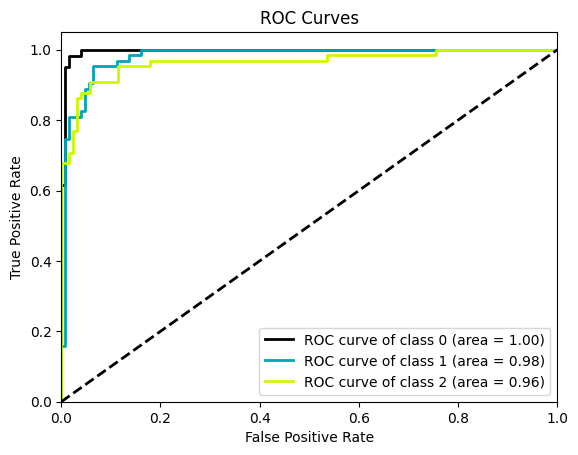

In [34]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc(y_test, y_proba,plot_micro =False,plot_macro= False)
plt.show()

# Miscellaneous:

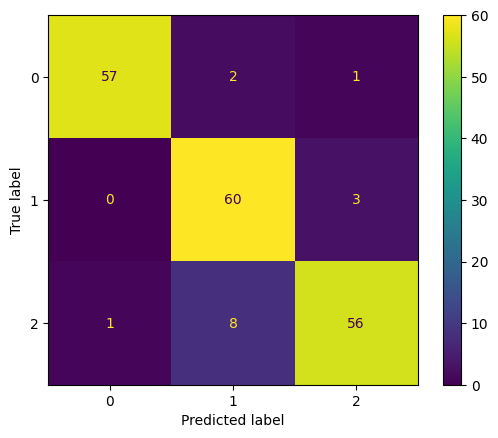

In [36]:
#######CONFUSION MATRIX ###########
from sklearn import metrics
y_test_pred_xgb = model_xgb.predict(X_test)
confusion_matrix_test = metrics.confusion_matrix(y_test, y_test_pred_xgb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test)
cm_display.plot()
plt.show()

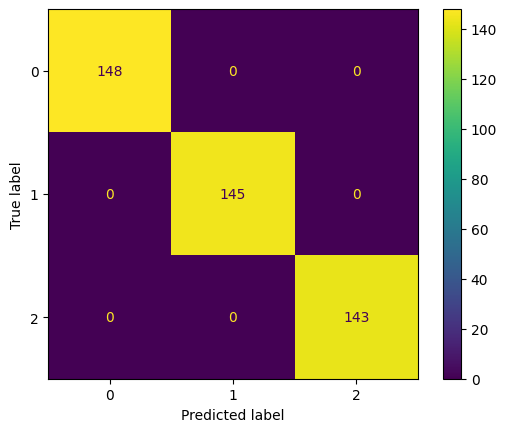

In [37]:
#######CONFUSION MATRIX ###########
y_train_pred_xgb = model_xgb.predict(X_train)
confusion_matrix_train = metrics.confusion_matrix(y_train, y_train_pred_xgb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_train)
cm_display.plot()
plt.show()

# Feature importance

In [38]:
# for important features:
important_feat = model_xgb.feature_importances_
#get indices of those important features
idx = important_feat.argsort(kind= "quicksort")
idx= idx[::-1][:18]

In [39]:
idx

array([720, 245, 356, 699, 265, 562, 487, 723, 601, 411, 589, 377, 777,
         7, 708, 670, 746, 454])

In [40]:
df1 = X_selected.T

In [41]:
top_met = df1.iloc[idx]

In [42]:
top_met.index

Index(['CA4', 'PPA1', 'MS4A12', 'CD177', 'PKIB', 'EPB41L2', 'GUCA2A', 'CA1',
       'DCN', 'LOX', 'DNASE1L3', 'MIF', 'AMPD1', 'ZC3HAV1L', 'CCL2', 'CHGA',
       'BEST2', 'IGFBP3'],
      dtype='object')